## 자전거 대여량 예측

워싱턴 D.C 소재의 자전거 대여 스타트업 Capital Bikeshare의 데이터를 활용하여, 특정 시간대에 얼마나 많은 사람들이 자전거를 대여하는지 예측하는 것이 목표입니다.

사람들이 자전거를 대여하는데는 많은 요소가 관여되어 있을 겁니다. 가령 **시간(새벽보다 낮에 많이 빌리겠죠)**, **날씨(비가 오면 자전거를 대여하지 않을 겁니다), 근무일(근무 시간에는 자전거를 대여하지 않겠죠)** 등. 이런 모든 요소를 조합하여 워싱턴 D.C의 자전거 교통량을 예측해주세요.

## 데이터 설명

#### 파일 구조
- train.csv
    - 학습을 위하여 활용되는 데이터 셋입니다.
- test.csv
    - 평가를 위하여 제공되는 데이터 셋입니다.
- submission.csv
    - test.csv 파일을 예측한 결과를 submission 파일에 작성한 후 제출합니다.
    
#### 컬럼 구조
  * **datetime** - 시간. 연-월-일 시:분:초 로 표현합니다. (가령 2011-01-01 00:00:00은 2011년 1월 1일 0시 0분 0초)
  * **season** - 계절. 봄(1), 여름(2), 가을(3), 겨울(4) 순으로 표현합니다.
  * **holiday** - 공휴일. 1이면 공휴일이며, 0이면 공휴일이 아닙니다.
  * **workingday** - 근무일. 1이면 근무일이며, 0이면 근무일이 아닙니다.
  * **weather** - 날씨. 1 ~ 4 사이의 값을 가지며, 구체적으로는 다음과 같습니다.
    * 1: 아주 깨끗한 날씨입니다. 또는 아주 약간의 구름이 끼어있습니다.
    * 2: 약간의 안개와 구름이 끼어있는 날씨입니다.
    * 3: 약간의 눈, 비가 오거나 천둥이 칩니다.
    * 4: 아주 많은 비가 오거나 우박이 내립니다.
  * **temp** - 온도. 섭씨(Celsius)로 적혀있습니다.
  * **atemp** - 체감 온도. 마찬가지로 섭씨(Celsius)로 적혀있습니다.
  * **humidity** - 습도.
  * **windspeed** - 풍속.
  * **casual** - 비회원(non-registered)의 자전거 대여량.
  * **registered** - 회원(registered)의 자전거 대여량.
  * **count** - 총 자전거 대여랑. 비회원(casual) + 회원(registered)과 동일합니다. **목표 변수**입니다.
  
  ## 프로젝트 구성
* 데이터 로드 (load data, train.csv, test.csv)
* 데이터 전처리 및 특성 공학 (train.csv, test.csv)
* 모델 생성 및 검증 (train.csv)
* 평가 데이터 예측 (test.csv)
* 결과 제출 및 점수 확인

## 제출 이력 및 순위 조회
[평가시스템](http://manage.jaen.kr)에 접속하여 확인 가능
> 로그인 -> 프로젝트 -> 자전거 대여량 예측 -> 리더보드

### 접속 정보
- ID : `~~~@sk.com`
- PWD : `mysuni`

## 환경 설정

In [1]:
project_name = "자전거 대여량 예측" # 프로젝트 이름
class_info = "15차수 A반" # 차수 정보
email = "test@sk.com" # 회사 이메일을 넣어주세요. (~~~@sk.com)

## 모듈 설치 및 데이터 다운로드

In [ ]:
!pip3 install mySUNI

In [2]:
from mySUNI import cds

In [ ]:
cds.download_project(project_name, class_info, email)

## 모듈 import 

필요한 모듈을 import 합니다. 필요에 따라 추가 패키지를 load 할 수 있습니다.

In [3]:
import os
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# Data 경로 설정
DATA_DIR = 'data'

# train 데이터셋 로드 (train.csv)
train = pd.read_csv(os.path.join(DATA_DIR, project_name, 'train.csv'))
                                 
# test 데이터셋 로드 (test.csv)
test = pd.read_csv(os.path.join(DATA_DIR, project_name, 'test.csv'))

# submission 파일 로드 (submission.csv)
submission = pd.read_csv(os.path.join(DATA_DIR, project_name, 'submission.csv'))

2개의 데이터 셋트를 나누어 제공합니다.

1. train: 학습용 데이터 세트. 정답 값이라고 할 수 있는 `label` 값이 같이 제공됩니다.
2. test: 예측용 데이터 세트. 정답 값이 빠진 `feature` 들만 제공됩니다. 우리는 이 `feature`를 활용하여 예측을 진행합니다.
3. submission: 정답 제출용 데이터 세트. 주어진 형식에 맞춰 정답 값을 기입하고 제출합니다.

In [4]:
# 학습 데이터 조회
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [5]:
# 평가 데이터 조회
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


# V0. timestamp 변환

In [6]:
train['datetime'] = pd.to_datetime(train['datetime'])
test['datetime'] = pd.to_datetime(test['datetime'])

train['year']=train['datetime'].dt.year
train['month']=train['datetime'].dt.month
train['day']=train['datetime'].dt.day
train['hour']=train['datetime'].dt.hour
train['quarter']=train['datetime'].dt.quarter
train['weekday']=train['datetime'].dt.weekday

test['year']= test['datetime'].dt.year
test['month']= test['datetime'].dt.month
test['day']= test['datetime'].dt.day
test['hour']= test['datetime'].dt.hour
test['quarter']= test['datetime'].dt.quarter
test['weekday']= test['datetime'].dt.weekday

In [ ]:
train.head()

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
features = [
    'season',
    'holiday',
    'workingday',
    'weather',
    'temp',
    'atemp',
    'humidity',
    'windspeed',
    'year',
    'hour',
    'quarter'
]

X = train[features]
Y = train['count']

x_train, x_test, y_train, y_test = train_test_split(X,Y, random_state=0)
model = RandomForestRegressor(random_state=123).fit(x_train, y_train)

In [ ]:
submission['count'] = model.predict(test[features])# test.csv를 예측한 결과 대입
cds.submit(submission) # 제출 파일 생성 및 결과 제출

# Y Log변환 

<AxesSubplot:xlabel='count', ylabel='Count'>

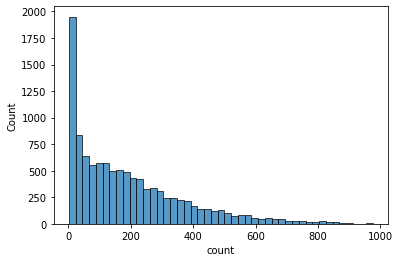

In [8]:
sns.histplot(train['count'])

<AxesSubplot:xlabel='count', ylabel='Count'>

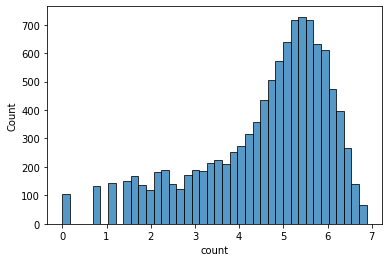

In [9]:
Y_log = np.log(train['count'])
sns.histplot(Y_log)

<AxesSubplot:xlabel='count', ylabel='Count'>

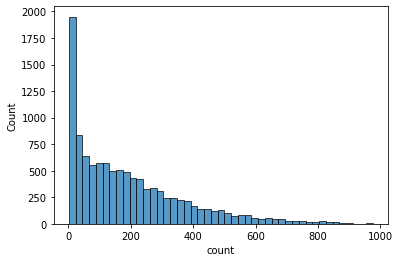

In [10]:
sns.histplot(np.exp(Y_log))

In [ ]:
X = train[features]
Y =  np.log(train['count'])
x_train, x_test, y_train, y_test = train_test_split(X,Y,random_state=0)

model = RandomForestRegressor(random_state=123).fit(x_train, y_train)

In [ ]:
submission['count'] = np.exp(model.predict(test[features]))# test.csv를 예측한 결과 대입
submission

In [ ]:
cds.submit(submission) # 제출 파일 생성 및 결과 제출

# Casual + registered = count

In [ ]:
X = train[features]
Y1 = np.log1p(train['registered'])
Y2 = np.log1p(train['casual'])

In [ ]:
from xgboost import XGBRegressor

reg = XGBRegressor(n_estimators=1000, learning_rate=0.01, n_jobs=-1, subsample=0.54, random_state=0).fit(X, Y1)
cas = XGBRegressor(n_estimators=1000, learning_rate=0.01, n_jobs=-1, subsample=0.54, random_state=0).fit(X, Y2)

In [ ]:
submission['count'] = np.expm1(reg.predict(test[features])) + np.expm1(cas.predict(test[features]))
cds.submit(submission) 